# FIFA World Cup 2026 Win probability Predictor Project

The FIFA Win Predictor aims to develop a model that accurately predicts the outcomes of a football matches. Given historical data such as team performance, player statistics, match location and other relevant factors.

The goal is to create a predictive model that forecasts the probability of a team winning, losing or drawing a match

### Importing all the modules required

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.kernel_approximation import RBFSampler  #just in case

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay,roc_curve,auc



### Data Exploration


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/IEEE Submissions/international_matches.csv")

data.shape

(23921, 25)

*NOTE* :- In the csv file we can see that there are many columns that are completely blank i.e `NAN`, they are of no use to us, we can drop them


In [ ]:
data.dropna(axis=1,inplace=True)

In [ ]:
data

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,UEFA Nations League,Chișinău,Moldova,False,No,Win
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,No,Lose
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,Kirin Cup,Suita,Japan,True,Yes,Lose
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,Kirin Cup,Suita,Japan,False,No,Lose


In [ ]:
data.shape

(23921, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   date                         23921 non-null  object
 1   home_team                    23921 non-null  object
 2   away_team                    23921 non-null  object
 3   home_team_continent          23921 non-null  object
 4   away_team_continent          23921 non-null  object
 5   home_team_fifa_rank          23921 non-null  int64 
 6   away_team_fifa_rank          23921 non-null  int64 
 7   home_team_total_fifa_points  23921 non-null  int64 
 8   away_team_total_fifa_points  23921 non-null  int64 
 9   home_team_score              23921 non-null  int64 
 10  away_team_score              23921 non-null  int64 
 11  tournament                   23921 non-null  object
 12  city                         23921 non-null  object
 13  country                      23

In [ ]:
data.isna().sum()

date                           0
home_team                      0
away_team                      0
home_team_continent            0
away_team_continent            0
home_team_fifa_rank            0
away_team_fifa_rank            0
home_team_total_fifa_points    0
away_team_total_fifa_points    0
home_team_score                0
away_team_score                0
tournament                     0
city                           0
country                        0
neutral_location               0
shoot_out                      0
home_team_result               0
dtype: int64

## Modelling

In [ ]:
# sp;itting our data into train and test sets

X=data.drop(["date","home_team_result"],axis=1)
y=data["home_team_result"]

In [ ]:
X

,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out
0,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No
1,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No
2,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No
3,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No
4,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,UEFA Nations League,Chișinău,Moldova,False,No
23917,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,No
23918,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,Kirin Cup,Suita,Japan,True,Yes
23919,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,Kirin Cup,Suita,Japan,False,No


In [ ]:
y

0         Win
1        Draw
2         Win
3         Win
4        Lose
         ... 
23916     Win
23917    Lose
23918    Lose
23919    Lose
23920     Win
Name: home_team_result, Length: 23921, dtype: object

In [ ]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [ ]:
X_train

,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out
10294,Colombia,Switzerland,South America,Europe,31,17,0,0,3,1,Friendly,Miami,USA,True,No
273,Zambia,Senegal,Africa,Africa,22,58,0,0,1,0,African Cup of Nations,Sousse,Tunisia,True,No
22264,Wales,Finland,Europe,Europe,20,55,1550,1402,3,1,UEFA Nations League,Cardiff,Wales,False,No
6916,Cyprus,Israel,Europe,Europe,86,43,0,0,1,1,UEFA Euro qualification,Limassol,Cyprus,False,No
7107,Republic of Ireland,Georgia,Europe,Europe,15,84,0,0,2,0,UEFA Euro qualification,Dublin,Republic of Ireland,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,Rwanda,Seychelles,Africa,Africa,133,192,1088,904,7,0,FIFA World Cup qualification,Kigali,Rwanda,False,No
5390,Oman,Sudan,Asia,Africa,101,120,0,0,0,1,Friendly,Muscat,Oman,False,No
860,Antigua and Barbuda,St. Kitts and Nevis,North America,North America,144,143,0,0,2,2,CFU Caribbean Cup qualification,St. John's,Antigua and Barbuda,False,Yes
15795,Maldives,Pakistan,Africa,Asia,159,170,130,88,3,0,Friendly,Malé,Maldives,False,No


We are going to try 4 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. SGD Classifier

In [ ]:
models={"Logistic Regression":LogisticRegression(solver='liblinear'),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SGD":SGDClassifier(loss="hinge", penalty="l2", max_iter=5)}

#Creating a function to fit model and score models

def fit_and_score(X_train,X_test,y_train,y_test,models):
    #Setting random seed
    np.random.seed(42)
    #Making a dictionary to keep model scores
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)

    return model_scores



In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((19136, 15), (19136,), (4785, 15), (4785,))

In [ ]:
model_scores=fit_and_score(X_train,X_test,y_train,y_test,models)
model_scores

ValueError: could not convert string to float: 'Colombia'

`Note`:- Here we can see that it shows error due the the string values present in our data

we need to change that into numerical representation that sklearn can understand, this can be done with help of pandas get_dummies function,
the y_train and y_test can be mapped Win:0, Lose:1, Draw:2


In [ ]:
X_train_new = pd.get_dummies(X_train[["home_team","away_team","home_team_continent","away_team_continent","tournament","city","country","shoot_out"]])
X_test_new = pd.get_dummies(X_test[["home_team","away_team","home_team_continent","away_team_continent","tournament","city","country","shoot_out"]])
X_train_new,X_train_new.shape

(       home_team_Afghanistan  home_team_Albania  home_team_Algeria  \
 10294                  False              False              False   
 273                    False              False              False   
 22264                  False              False              False   
 6916                   False              False              False   
 7107                   False              False              False   
 ...                      ...                ...                ...   
 21575                  False              False              False   
 5390                   False              False              False   
 860                    False              False              False   
 15795                  False              False              False   
 23654                  False              False              False   
 
        home_team_American Samoa  home_team_Andorra  home_team_Angola  \
 10294                     False              False             False   


In [ ]:
#similarily we will do this with other values

label_mapping = {'Win': 0, 'Lose': 1, 'Draw': 2}
y_train_new = y_train.map(label_mapping)

y_test_new = y_test.map(label_mapping)

X_test_new.shape,y_test_new.shape,y_train_new.shape

((4785, 1637), (4785,), (19136,))

In [ ]:
y_train_new

10294    0
273      0
22264    0
6916     2
7107     0
        ..
21575    0
5390     1
860      0
15795    0
23654    1
Name: home_team_result, Length: 19136, dtype: int64

In [ ]:
X_test_new.shape,X_train_new.shape,y_train_new.shape,y_test_new.shape


((4785, 1637), (19136, 2214), (19136,), (4785,))

`NOTE`:- here we can see that the X_train_new and X_test_new are having different shapes, this needs to be resorted, we need to concatenate the X_train and X_test and then convert the data and then break them again

In [ ]:
X_train

,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out
10294,Colombia,Switzerland,South America,Europe,31,17,0,0,3,1,Friendly,Miami,USA,True,No
273,Zambia,Senegal,Africa,Africa,22,58,0,0,1,0,African Cup of Nations,Sousse,Tunisia,True,No
22264,Wales,Finland,Europe,Europe,20,55,1550,1402,3,1,UEFA Nations League,Cardiff,Wales,False,No
6916,Cyprus,Israel,Europe,Europe,86,43,0,0,1,1,UEFA Euro qualification,Limassol,Cyprus,False,No
7107,Republic of Ireland,Georgia,Europe,Europe,15,84,0,0,2,0,UEFA Euro qualification,Dublin,Republic of Ireland,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,Rwanda,Seychelles,Africa,Africa,133,192,1088,904,7,0,FIFA World Cup qualification,Kigali,Rwanda,False,No
5390,Oman,Sudan,Asia,Africa,101,120,0,0,0,1,Friendly,Muscat,Oman,False,No
860,Antigua and Barbuda,St. Kitts and Nevis,North America,North America,144,143,0,0,2,2,CFU Caribbean Cup qualification,St. John's,Antigua and Barbuda,False,Yes
15795,Maldives,Pakistan,Africa,Asia,159,170,130,88,3,0,Friendly,Malé,Maldives,False,No


In [ ]:
combined_data = pd.concat([X_train, X_test])

# Convert specified columns to categorical
categorical_columns = ['home_team', 'away_team', 'home_team_continent', 'away_team_continent', 'tournament', 'city', 'country','shoot_out']
for col in categorical_columns:
    combined_data[col] = combined_data[col].astype('category')

# Apply one-hot encoding
combined_encoded = pd.get_dummies(combined_data, columns=categorical_columns)

# Split back into train and test
X_train_encoded = combined_encoded.iloc[:len(X_train)]
X_test_encoded = combined_encoded.iloc[len(X_train):]

In [ ]:
X_train_encoded.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,neutral_location,home_team_Afghanistan,home_team_Albania,home_team_Algeria,...,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wales,country_Yemen,country_Zambia,country_Zimbabwe,shoot_out_No,shoot_out_Yes
10294,31,17,0,0,3,1,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
273,22,58,0,0,1,0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
22264,20,55,1550,1402,3,1,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
6916,86,43,0,0,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7107,15,84,0,0,2,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
X_train_encoded.shape, y_train_new.shape,X_test_encoded.shape,y_test_new.shape

((19136, 2318), (19136,), (4785, 2318), (4785,))

Now since all the data is in the format that we wanted, we can now fit them

In [ ]:
model_scores=fit_and_score(X_train_encoded,X_test_encoded,y_train_new,y_test_new,models)
print(model_scores)

{'Logistic Regression': 0.9924764890282132, 'KNN': 0.6010449320794148, 'Random Forest': 0.935005224660397, 'SGD': 0.5306165099268547}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Hyperparameter tuning with RandomizedSearchCV


we will use logistic regression model and RandomForest model as they performed the best out of all

In [ ]:
#Creating a hyperparameter grid for Logisitc Regression

log_reg_grid={"C": np.logspace(-4,4,20),
              "solver":["liblinear"]}

#Creating a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [ ]:
np.random.seed(42)

#Setup random hyperparamter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
rs_log_reg.fit(X_train_encoded,y_train_new)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [ ]:
rs_log_reg.score(X_test_encoded,y_test_new)

0.9920585161964472

In [ ]:
#Setting random hyperparamter search for RandomForestClassifier

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                     param_distributions=rf_grid,
                     n_iter=20,
                     cv=5,
                     verbose=True)

#Fiting the data in the search model for RandomForestClassifier
rs_rf.fit(X_train_encoded,y_train_new)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
rs_rf.score(X_test_encoded,y_test_new)

0.9410658307210031

Now out of this the logistic regression has better accuracy so we will carry on with it

## Evaluating our machine

having 99% accuracy is a very good thing for our model, but it can also mean that it is overfitting

We will find:-

* Precision
* Recall
* F1-score
* Classification Report
* Confusion Matrix
* ROC Curve
* Area Under the Curve

In [ ]:
#Making predictions with our tuned model

y_preds=rs_log_reg.predict(X_test_encoded)

In [ ]:
y_preds

array([1, 1, 2, ..., 1, 0, 1])

In [ ]:
# Making plot roc curve function
y_probs=rs_log_reg.predict_proba(X_test_encoded)
y_probs

array([[1.24089521e-22, 8.78061989e-01, 1.21938011e-01],
       [6.74568753e-56, 8.35100183e-01, 1.64899817e-01],
       [4.52474183e-07, 1.16898642e-01, 8.83100906e-01],
       ...,
       [1.10420342e-11, 9.55148004e-01, 4.48519960e-02],
       [7.05315832e-01, 1.45257804e-10, 2.94684168e-01],
       [6.81479122e-28, 6.82701272e-01, 3.17298728e-01]])

In [ ]:
y_probs_positive=y_probs[:,1]

In [ ]:
y_probs

array([[1.24089521e-22, 8.78061989e-01, 1.21938011e-01],
       [6.74568753e-56, 8.35100183e-01, 1.64899817e-01],
       [4.52474183e-07, 1.16898642e-01, 8.83100906e-01],
       ...,
       [1.10420342e-11, 9.55148004e-01, 4.48519960e-02],
       [7.05315832e-01, 1.45257804e-10, 2.94684168e-01],
       [6.81479122e-28, 6.82701272e-01, 3.17298728e-01]])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming y_test_new has multiple classes
# Binarize the target variable to work with One-vs-Rest
y_test_bin = label_binarize(y_test_new, classes=[0, 1, 2])  # Adjust classes accordingly

# Fit a classifier
classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X_train_encoded, y_train_new)  # Use your training data here

# Get probabilities for a specific class (e.g., class 1)
y_probs = classifier.decision_function(X_test_encoded)  # Or use `predict_proba`

# Calculate ROC curve for a specific class (e.g., class 1)
fpr, tpr, threshold = roc_curve(y_test_bin[:, 1], y_probs[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.90697674e-04,
       2.90697674e-04, 5.81395349e-04, 5.81395349e-04, 8.72093023e-04,
       8.72093023e-04, 2.61627907e-03, 2.61627907e-03, 4.06976744e-03,
       4.06976744e-03, 4.36046512e-03, 4.36046512e-03, 4.65116279e-03,
       4.65116279e-03, 5.23255814e-03, 5.23255814e-03, 5.52325581e-03,
       5.52325581e-03, 6.10465116e-03, 6.10465116e-03, 6.97674419e-03,
       6.97674419e-03, 7.55813953e-03, 7.55813953e-03, 9.01162791e-03,
       9.01162791e-03, 9.59302326e-03, 9.59302326e-03, 1.07558140e-02,
       1.07558140e-02, 1.10465116e-02, 1.10465116e-02, 3.77325581e-01,
       3.77906977e-01, 5.48546512e-01, 5.49127907e-01, 1.00000000e+00])

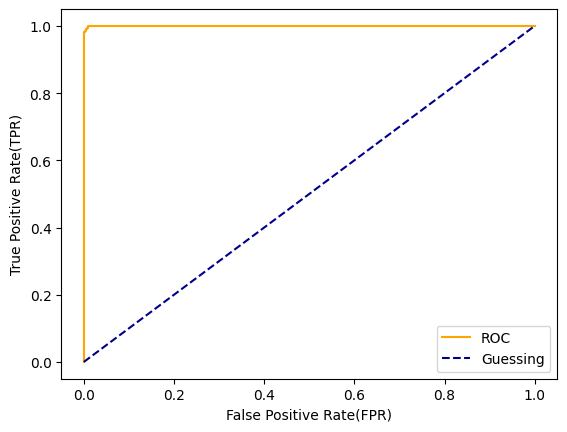

In [ ]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="Orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

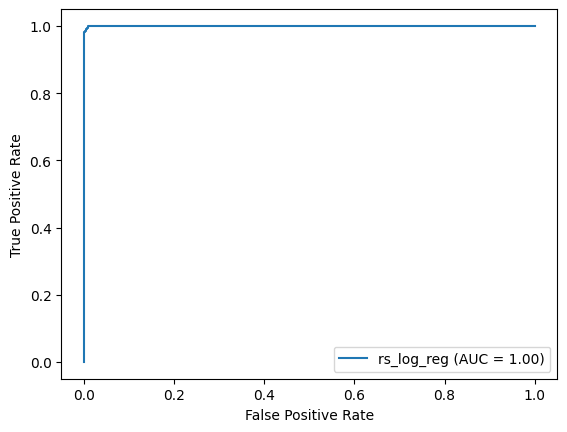

In [ ]:
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name="rs_log_reg")
display.plot()

In [ ]:
#Confusion matrix
print(confusion_matrix(y_test_new,y_preds))

[[2354   18    0]
 [  16 1329    0]
 [   1    3 1064]]


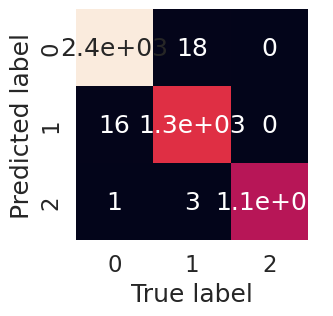

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    """ Plotting a confusion matrix using Seaborn's Heatmap"""
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")


plot_conf_matrix(y_test_new,y_preds)

In [ ]:
print(classification_report(y_test_new,y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2372
           1       0.98      0.99      0.99      1345
           2       1.00      1.00      1.00      1068

    accuracy                           0.99      4785
   macro avg       0.99      0.99      0.99      4785
weighted avg       0.99      0.99      0.99      4785

